In [94]:
import pandas as pd

We load the anime dataset

In [95]:
anime_df = pd.read_csv('/content/drive/MyDrive/DIC-Anime-Recommendation/Dataset-2/anime-dataset-2023.csv')

In [96]:
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


The **Aired** attribute is very important for us. Our target is to extract information like how long an anime runs, is it still ongoing, how many episodes does it have

**Preprocessing step 1**: The aim is to extract start date and end date of an anime and add those 2 as new columns to the dataframe

I split the date using the word **to**

In [97]:
aired = anime_df['Aired'].str.split('to', expand=True)

Then strip whitespaces

In [98]:
aired[0] = aired[0].str.strip()
aired[1] = aired[1].str.strip()

In [99]:
aired

,0,1
0,"Apr 3, 1998","Apr 24, 1999"
1,"Sep 1, 2001",None
2,"Apr 1, 1998","Sep 30, 1998"
3,"Jul 3, 2002","Dec 25, 2002"
4,"Sep 30, 2004","Sep 29, 2005"
...,...,...
24900,"Jul 4, 2023",?
24901,"Jul 27, 2023",?
24902,"Jul 19, 2023",?
24903,"Apr 23, 2022",None


Finally convert both Start date and end date to datetime objects

In [100]:
aired[0] = pd.to_datetime(aired[0], format='%b %d, %Y', errors='coerce')
aired[1] = pd.to_datetime(aired[1], format='%b %d, %Y', errors='coerce')

In [101]:
aired

,0,1
0,1998-04-03,1999-04-24
1,2001-09-01,NaT
2,1998-04-01,1998-09-30
3,2002-07-03,2002-12-25
4,2004-09-30,2005-09-29
...,...,...
24900,2023-07-04,NaT
24901,2023-07-27,NaT
24902,2023-07-19,NaT
24903,2022-04-23,NaT


Rename the clomns

In [102]:
aired.rename(columns={0: 'Start Date', 1: 'End Date'}, inplace=True)

In [103]:
aired

,Start Date,End Date
0,1998-04-03,1999-04-24
1,2001-09-01,NaT
2,1998-04-01,1998-09-30
3,2002-07-03,2002-12-25
4,2004-09-30,2005-09-29
...,...,...
24900,2023-07-04,NaT
24901,2023-07-27,NaT
24902,2023-07-19,NaT
24903,2022-04-23,NaT


Inserted the new columns to the original dataframe

In [104]:
anime_df.insert(10, 'Start Date', aired['Start Date'])
anime_df.insert(11, 'End Date', aired['End Date'])

In [105]:
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [106]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   anime_id      24905 non-null  int64         
 1   Name          24905 non-null  object        
 2   English name  24905 non-null  object        
 3   Other name    24905 non-null  object        
 4   Score         24905 non-null  object        
 5   Genres        24905 non-null  object        
 6   Synopsis      24905 non-null  object        
 7   Type          24905 non-null  object        
 8   Episodes      24905 non-null  object        
 9   Aired         24905 non-null  object        
 10  Start Date    20090 non-null  datetime64[ns]
 11  End Date      9337 non-null   datetime64[ns]
 12  Premiered     24905 non-null  object        
 13  Status        24905 non-null  object        
 14  Producers     24905 non-null  object        
 15  Licensors     24905 non-null  object

**Preprocessing step 2**: The aim is to addd a new cloumn named **Ongoing**. The way I do this is the aired column has format from start date to end date. The end date has ?. Hence the rows having ? are tagged as ongoing animes

In [107]:
import numpy as np

In [108]:
def check(value):
    return 1 if '?' in value else 0

In [109]:
anime_df['Ongoing'] = anime_df['Aired'].apply(check)

In [110]:
anime_df.loc[11,'Ongoing']

1

In [111]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   anime_id      24905 non-null  int64         
 1   Name          24905 non-null  object        
 2   English name  24905 non-null  object        
 3   Other name    24905 non-null  object        
 4   Score         24905 non-null  object        
 5   Genres        24905 non-null  object        
 6   Synopsis      24905 non-null  object        
 7   Type          24905 non-null  object        
 8   Episodes      24905 non-null  object        
 9   Aired         24905 non-null  object        
 10  Start Date    20090 non-null  datetime64[ns]
 11  End Date      9337 non-null   datetime64[ns]
 12  Premiered     24905 non-null  object        
 13  Status        24905 non-null  object        
 14  Producers     24905 non-null  object        
 15  Licensors     24905 non-null  object

**Preprocessing step 3**: The episodes field is also very important for us. We can infer whether people like short animes or long animes based on number of episodes.
However some records of our dataset have "UNKNOWN" in the episodes field, this is because the anime is currently running. Just for analysis purpose, we assume all animes end on jan 01 2024 to get the episode count till that date, since each episode is released once in a week

In [112]:
for index, row in anime_df.iterrows():
    if row['Episodes'] == 'UNKNOWN':
        anime_df.loc[index, 'Episodes'] = ((pd.to_datetime('Jan 01, 2024', format='%b %d, %Y') - row['Start Date']).days / 7)

In [113]:
anime_df[anime_df['Episodes'] == 'UNKNOWN']

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Ongoing


In [114]:
anime_df.loc[11]

,11
anime_id,21
Name,One Piece
English name,One Piece
Other name,ONE PIECE
Score,8.69
Genres,"Action, Adventure, Fantasy"
Synopsis,"Gol D. Roger was known as the ""Pirate King,"" t..."
Type,TV
Episodes,1262.714286
Aired,"Oct 20, 1999 to ?"


**Preprocessing Step 4:** finally we normalize episodes field so that we can bring it to a common scale for comparing between different animes

We use MinMax normalization which shrinks the scale between 0 to 1.
X_norm = (X−min(X))/(max(X)−min(X))
​



In [115]:
anime_df['Episodes'] = anime_df['Episodes'].astype(float)

In [116]:
anime_df['Episodes_Normalized'] = (anime_df['Episodes'] - anime_df['Episodes'].min()) / (anime_df['Episodes'].max() - anime_df['Episodes'].min())

In [117]:
anime_df['Episodes_Normalized']

,Episodes_Normalized
0,0.008181
1,0.000000
2,0.008181
3,0.008181
4,0.016688
...,...
24900,0.004581
24901,0.005563
24902,0.004908
24903,0.000000


**Question 1:** Do people like long animes or short animes?

This question is critical for an Anime Recommendation system. People's preference may differ based on interest

We frame the **hypothesis** as 'Long running animes have higher scores'

We will use 'Episode' column and 'Score' column. 'Episode' column had some 'UNKNOWN' values, which we have already preprocessed.

**EDA 1**

We plan to plot a scatter plot to check for trends and biases.
We do necessary cleaning and feature selection

In [118]:
target_df = anime_df[['Episodes', 'Score']]

In [119]:
target_df.head()

,Episodes,Score
0,26.0,8.75
1,1.0,8.38
2,26.0,8.22
3,26.0,7.25
4,52.0,6.94


In [120]:
target_df['Episodes'].unique()

array([2.60000000e+01, 1.00000000e+00, 5.20000000e+01, 1.45000000e+02,
       2.40000000e+01, 7.40000000e+01, 2.20000000e+02, 1.26271429e+03,
       1.78000000e+02, 1.20000000e+01, 2.20000000e+01, 6.90000000e+01,
       2.50000000e+01, 4.00000000e+00, 9.40000000e+01, 5.00000000e+00,
       3.00000000e+00, 1.30000000e+01, 2.30000000e+01, 4.30000000e+01,
       6.00000000e+00, 5.00000000e+01, 4.70000000e+01, 5.10000000e+01,
       4.90000000e+01, 3.90000000e+01, 8.00000000e+00, 7.00000000e+00,
       7.50000000e+01, 6.20000000e+01, 1.40000000e+01, 4.40000000e+01,
       4.50000000e+01, 6.40000000e+01, 1.01000000e+02, 2.70000000e+01,
       1.61000000e+02, 2.00000000e+00, 1.53000000e+02, 7.00000000e+01,
       7.80000000e+01, 1.46000000e+03, 4.20000000e+01, 1.10000000e+01,
       1.67000000e+02, 1.50000000e+02, 3.66000000e+02, 9.00000000e+00,
       1.60000000e+01, 3.80000000e+01, 4.80000000e+01, 1.00000000e+01,
       7.60000000e+01, 4.00000000e+01, 2.00000000e+01, 3.70000000e+01,
      

In [121]:
target_df['Score'].unique()


array(['8.75', '8.38', '8.22', '7.25', '6.94', '7.92', '8.0', '7.55',
       '8.16', '8.87', '7.99', '8.69', '7.86', '6.39', '7.89', '7.38',
       '7.76', '7.29', '7.91', '7.48', '8.35', '7.46', '8.55', '8.56',
       '8.27', '8.71', '8.29', '6.95', '7.32', '6.27', '7.26', '7.11',
       '7.06', '6.51', '5.86', '7.03', '7.4', '7.62', '7.17', '6.72',
       '6.56', '7.41', '7.33', '6.31', '7.61', '8.03', '7.93', '7.64',
       '7.97', '8.01', '7.96', '6.76', '7.24', '7.9', '6.68', '7.66',
       '6.62', '6.77', '7.69', '7.74', '7.34', '7.75', '7.18', '7.57',
       '7.79', '7.42', '7.28', '7.16', '7.44', '7.49', '6.4', '7.19',
       '6.79', '7.58', '6.97', '4.82', '7.37', '6.93', '6.78', '6.52',
       '8.11', '7.94', '6.82', '6.44', '6.86', '6.92', '6.74', '6.15',
       '7.39', '8.08', '8.41', '8.31', '8.18', '8.25', '6.1', '6.81',
       '7.07', '7.59', '6.71', '7.1', '7.27', '8.02', '6.57', '6.28',
       '7.3', '6.55', '8.67', '7.36', '8.54', '6.32', '7.2', '6.88',
       '6.59',

In [122]:
target_df = target_df.drop(target_df[target_df['Score'] == 'UNKNOWN'].index)

In [123]:
target_df['Score'] = target_df['Score'].astype(float)


In [124]:
target_df.dropna()

,Episodes,Score
0,26.0,8.75
1,1.0,8.38
2,26.0,8.22
3,26.0,7.25
4,52.0,6.94
...,...,...
24590,1.0,5.99
24635,1.0,6.45
24729,1.0,6.07
24831,1.0,6.29


We filter animes with episode count minimum 100. We have some movies and really short series which include bias to our dataset

In [125]:
target_df = target_df[target_df['Episodes'] >100]

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

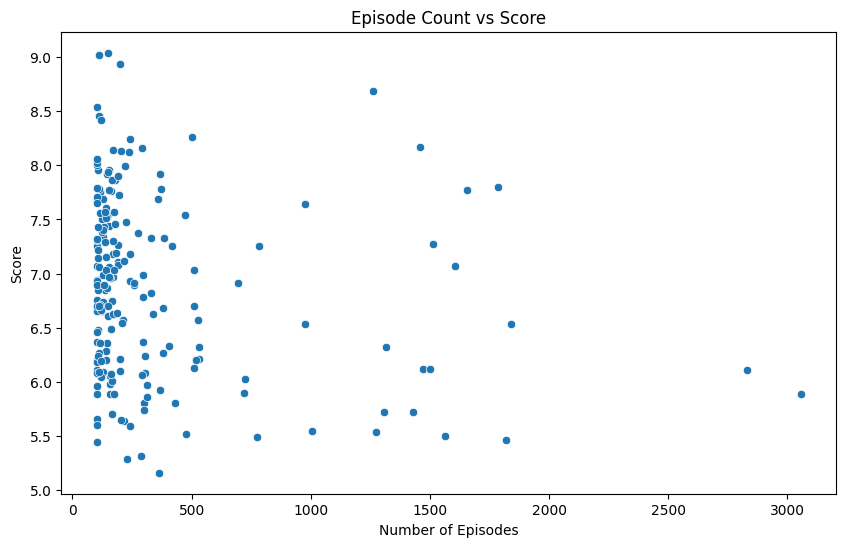

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Episodes', y='Score', data=target_df)
plt.title('Episode Count vs Score')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

There seems to be a cluster for animes having less than 500 episodes, however their ratings are scattered from 5.5 to 8. This plot basically suggests that there is no strong correlation between anime score and number of episodes, and hence score depends on other factors too.

We also have some outliers indicating series with either a high number of episodes and a low score, or vice versa.

The presence of outliers also suggest potential bias present in the dataset since animes with around 3000 episodes are rated lower

Lets calculate correlation between the episodes and score

In [128]:
correlation = target_df['Episodes'].corr(target_df['Score'])

In [129]:
correlation

-0.1820350120174825

Correlation close to 0 suggest episodes and score have weak correlation

**EDA 2**

We plan to distribute the score into bins to get an idea which range of episodes have the highest score

In [130]:
bins = [1, 5, 7, 9, 10]
labels = ['1-5', '5-7', '7-9', '9-10']
target_df['score_category'] = pd.cut(target_df['Score'], bins=bins, labels=labels)

In [131]:
target_df

,Episodes,Score,score_category
5,145.000000,7.92,7-9
10,220.000000,7.99,7-9
11,1262.714286,8.69,7-9
12,178.000000,7.86,7-9
148,101.000000,8.54,7-9
...,...,...,...
21738,104.000000,7.32,7-9
21809,103.285714,5.44,5-7
22099,120.000000,6.19,5-7
22468,103.428571,6.70,5-7


In [132]:
score_group = target_df.groupby('score_category')['Episodes'].mean()

<ipython-input-132-9704a731daad>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_group = target_df.groupby('score_category')['Episodes'].mean()


In [133]:
score_group

,Episodes
score_category,
1-5,NaN
5-7,393.352041
7-9,295.588235
9-10,129.000000


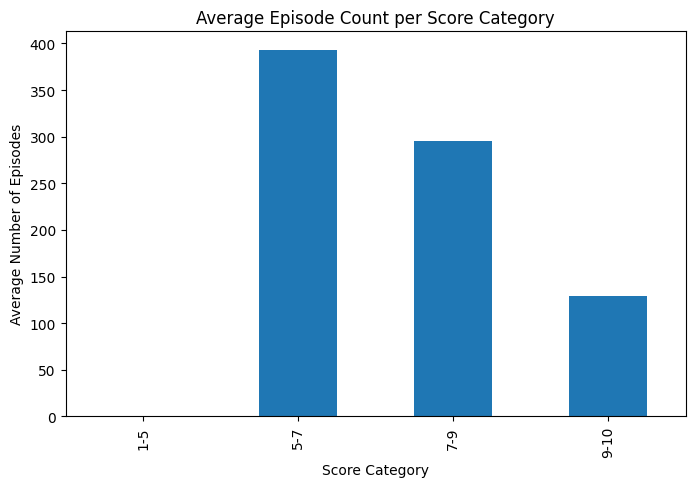

In [134]:
plt.figure(figsize=(8, 5))
score_group.plot(kind='bar')
plt.title('Average Episode Count per Score Category')
plt.xlabel('Score Category')
plt.ylabel('Average Number of Episodes')
plt.show()

We get similar results from this graph too. The general trend that this plot shows is that score increases as number of episodes decrease.
Also we have no anime in our dataset having score in the range 1 to 5.

This further adds to the bias since we do not know what number of episodes those lower scored animes had.

The sweet spot acoording to our plot is for the highest rated animes having average number of episoded around 150

In [135]:
target_df[(target_df['Score']>1) & (target_df['Score']<5)]

,Episodes,Score,score_category


Here we confirm that we have 0 animes having score in the range 1 to 5 in our data frame after processing

Finally, to answer our hypotheses, our plots suggest that score and number of episodes are not strongly correlated and the score depends on other factors too.

However,our bar graph does suggest highest rated animes having average number of episoded around 150

**Question 2:** which Genres are the most popular?

This question will help us figure out the popular genres so as to recommend animes having those genres to new user

We frame the hypothesis as 'Popular Genre animes usually have higher score'

We will use 'Genres' column and 'Score' column. Both columns have 'UNKNOWN' values which need to be dropped

**EDA 1**

We plan to plot a box plot to analyse the score's min, max, mean and quartiles.
We do necessary cleaning and feature selection

In [136]:
target_df = anime_df[['Genres', 'Score']]


In [137]:
target_df

,Genres,Score
0,"Action, Award Winning, Sci-Fi",8.75
1,"Action, Sci-Fi",8.38
2,"Action, Adventure, Sci-Fi",8.22
3,"Action, Drama, Mystery, Supernatural",7.25
4,"Adventure, Fantasy, Supernatural",6.94
...,...,...
24900,"Comedy, Fantasy, Slice of Life",UNKNOWN
24901,"Action, Adventure, Fantasy",UNKNOWN
24902,"Action, Adventure, Fantasy, Sci-Fi",UNKNOWN
24903,UNKNOWN,UNKNOWN


In [138]:
target_df = target_df.drop(target_df[target_df['Score'] == 'UNKNOWN'].index)

In [139]:
target_df = target_df.drop(target_df[target_df['Genres'] == 'UNKNOWN'].index)


In [140]:
target_df['Score'] = target_df['Score'].astype(float)


In [141]:
target_df['Genres_Split'] = target_df['Genres'].str.split(', ')

In [142]:
target_df

,Genres,Score,Genres_Split
0,"Action, Award Winning, Sci-Fi",8.75,"[Action, Award Winning, Sci-Fi]"
1,"Action, Sci-Fi",8.38,"[Action, Sci-Fi]"
2,"Action, Adventure, Sci-Fi",8.22,"[Action, Adventure, Sci-Fi]"
3,"Action, Drama, Mystery, Supernatural",7.25,"[Action, Drama, Mystery, Supernatural]"
4,"Adventure, Fantasy, Supernatural",6.94,"[Adventure, Fantasy, Supernatural]"
...,...,...,...
24539,"Action, Adventure, Comedy, Fantasy",6.47,"[Action, Adventure, Comedy, Fantasy]"
24557,Fantasy,7.78,[Fantasy]
24579,"Action, Comedy, Fantasy",5.84,"[Action, Comedy, Fantasy]"
24590,"Action, Comedy, Mystery",5.99,"[Action, Comedy, Mystery]"


In [143]:
target_df = target_df.explode('Genres_Split')

In [144]:
target_df

,Genres,Score,Genres_Split
0,"Action, Award Winning, Sci-Fi",8.75,Action
0,"Action, Award Winning, Sci-Fi",8.75,Award Winning
0,"Action, Award Winning, Sci-Fi",8.75,Sci-Fi
1,"Action, Sci-Fi",8.38,Action
1,"Action, Sci-Fi",8.38,Sci-Fi
...,...,...,...
24590,"Action, Comedy, Mystery",5.99,Mystery
24831,"Action, Adventure, Comedy, Fantasy",6.29,Action
24831,"Action, Adventure, Comedy, Fantasy",6.29,Adventure
24831,"Action, Adventure, Comedy, Fantasy",6.29,Comedy


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


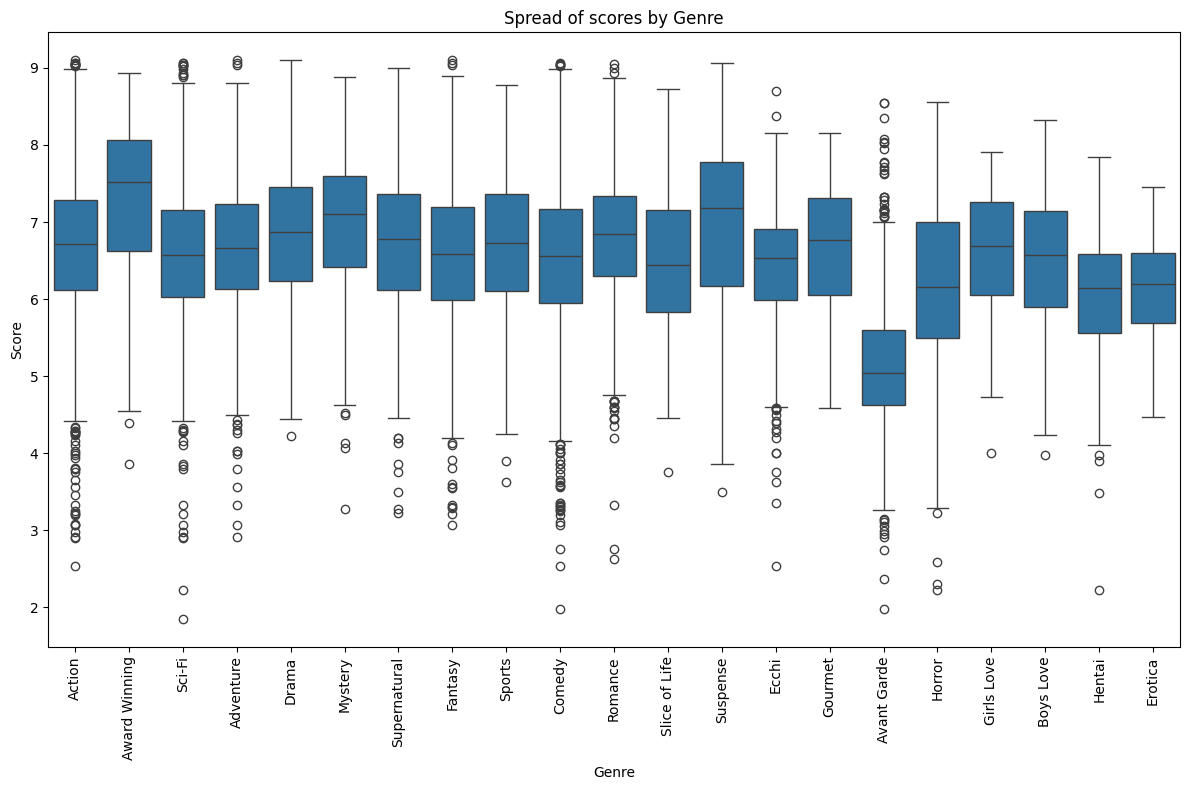

In [145]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres_Split', y='Score', data=target_df)
plt.title('Spread of scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Genres like Award-Winning and Suspense have the highest median scores whereas Avant Garde has the lowest median score

We have many outliers suggesting some genres recieved much lower or higher scoress in their genre respectively which suggests potential bias present, maybe for animes like Action, Comedy and Avant Garde

**EDA 2**

We plan to plot a Bar chart of average score by genre
We do necessary cleaning and feature selection

In [146]:
target_df = target_df.groupby('Genres_Split')['Score'].mean().sort_values(ascending=False)

In [147]:
target_df

,Score
Genres_Split,
Award Winning,7.296308
Mystery,6.995093
Suspense,6.962963
Drama,6.850645
Romance,6.804509
Supernatural,6.744600
Sports,6.722046
Action,6.674112
Adventure,6.673997


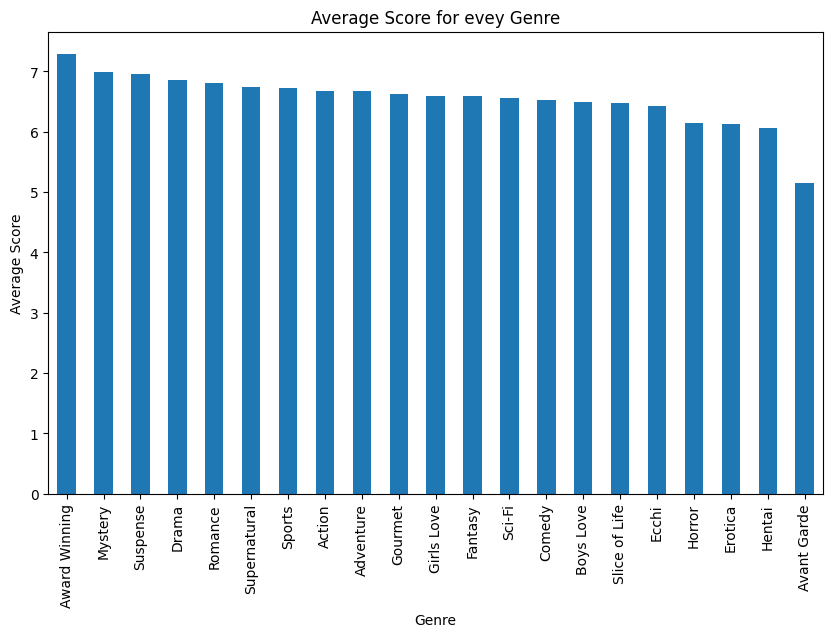

In [148]:
plt.figure(figsize=(10, 6))
target_df.plot(kind='bar')
plt.title('Average Score for evey Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Award Winning animes are the only animes managed to cross 7 average score suggesting high preference among viewers.

Genres like avant garde have lowest average score suggesting they may be a niche or have a more specialized appealing

Finally, to answer our hypotheses, we have identified popular anime genres like Award Wining, Mystery, Suspense